In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from davenet import Neuron, Layer, Sigmoid
import numpy as np
import matplotlib.pyplot as plt

In [58]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_reshaped = x_train.reshape((len(x_train), 28*28))
x_test_reshaped = x_test.reshape((len(x_test), 28*28))

In [59]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

x_train_reshaped = MinMaxScaler().fit_transform(x_train_reshaped)
x_test_reshaped = MinMaxScaler().fit_transform(x_train_reshaped)
y_train_enc = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))
y_test = OneHotEncoder(sparse=False).fit_transform(y_test.reshape(-1, 1))

In [60]:
l0 = Layer(100, Sigmoid(), 28*28)
print(l0)
l1 = Layer(50, Sigmoid())(l0)
print(l1)
output = Layer(10, Sigmoid())(l1)
print(output)

Layer(num_neurons=100, activation=Sigmoid(name='sigmoid'), input_shape=784, neurons=[Neuron(input_shape=784, activation_function=Sigmoid(name='sigmoid'), weights=array([ 4.20807358e-01, -5.18617249e-01,  8.85365614e-01,  7.97678290e-01,
       -7.76696460e-03,  2.02371193e-01,  6.89446331e-01,  3.34871170e-01,
        4.68714343e-01, -7.02806771e-01, -9.01806682e-01,  4.29521144e-01,
        9.68531079e-01, -7.21242389e-01, -3.85445279e-01,  1.00698834e-01,
        8.75586668e-01,  9.65654535e-01,  5.26249922e-02, -9.76169284e-01,
        7.26030161e-01,  1.12318155e-01, -7.20185876e-01, -8.98237691e-01,
       -7.68134446e-01,  2.85799955e-02, -6.82319837e-01,  8.00984048e-02,
       -2.14055140e-01, -1.00459832e-01, -6.88854480e-01, -2.64344806e-01,
        4.53768482e-01, -6.31247247e-01, -8.00018922e-01,  6.09336800e-02,
        9.93560406e-01,  2.29662134e-01, -2.85585017e-01, -8.23763046e-03,
        4.54616888e-01, -3.64540678e-01,  7.75120542e-01,  5.98039590e-01,
       -7.906

In [61]:
from tqdm import tqdm

all_E = []
for i in range(1000):
    epoch_E = []
    idx = np.random.choice(np.arange(len(x_train)), size=16, replace=False)
    for x, y in zip(x_train_reshaped[idx], y_train_enc[idx]):
        a0 = l0.forward(x)
        a1 = l1.forward(a0)
        o = output.forward(a1)
        o = np.squeeze(o)

        E = 0.5*np.sum((y - o)**2)
        epoch_E += [E]
        E_prime = (o - y)

        output.backward(E_prime)
        l1.backward(np.dot(output.weights.T, output.error))
        l0.backward(np.dot(l1.weights.T, l1.error))
    
    output.update_weights(lr=0.05)
    l1.update_weights(lr = 0.05)
    l0.update_weights(lr = 0.05)
        
    all_E += [np.mean(epoch_E)]
    print(all_E[-1])
    
    

0.4995738456626409
0.49906621109986593
0.49799997903163773
0.4958204817357196
0.49098473680940696
0.4852097021310786
0.48782045839288934
0.5004419814516439
0.46538360086937053
0.47587216116039494
0.48957914674833614
0.4610369608443471
0.4610555042991181
0.42930016468642873
0.4455111136648744
0.45881320952827037
0.4924302394798691
0.4450206189210352
0.4472352207189967
0.44019840184130316
0.4156832943125687
0.36279539417634266
0.4265026170131374
0.4061219874570455
0.39950028512377916
0.44823867093637393
0.38625215217730613
0.34103860055750457
0.41575871835417477
0.4255601306896514
0.40523439468283484
0.4040702221638962
0.43633027729059853
0.3928999421778989
0.3587366914236895
0.3956519541620832
0.3879118472161512
0.4218782657159405
0.28170373558495554
0.3859152682047934
0.39979558252565983
0.3388213853087767
0.34379845198645365
0.2935142508398998
0.31237061427503504
0.3227555406900558
0.3300990492848227
0.3442930996266869
0.3223426708980558
0.33340173239837534
0.41093448255926873
0.34478

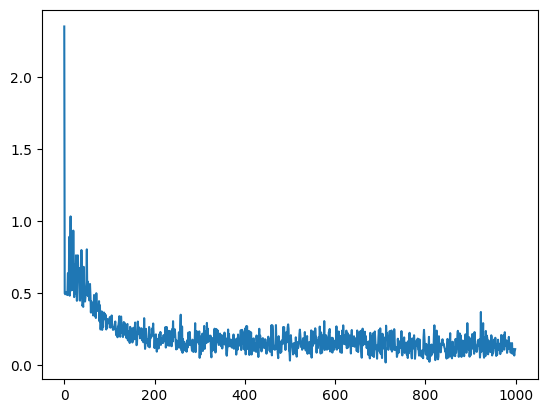

In [ ]:
plt.figure()
plt.plot(all_E)
plt.show()

In [54]:
ind = np.random.choice(np.arange(len(x_test_reshaped)))

xx = x_train_reshaped[ind, :]
yy = np.argmax(y_train_enc[ind])

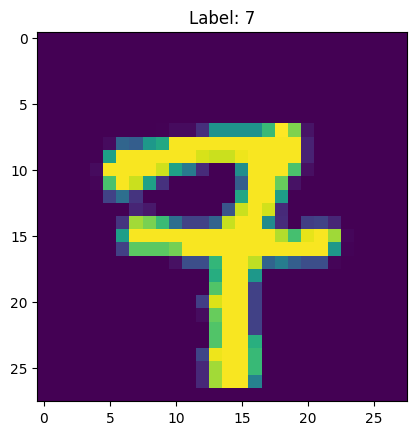

In [55]:
plt.figure()
plt.imshow(np.reshape(xx, (28, 28)))
plt.title(f'Label: {yy}')
plt.show()



In [56]:
a0 = l0.forward(xx)
a1 = l1.forward(a0)
o = output.forward(a1)
o = np.squeeze(o)
print(np.argmax(o))

7
